## Visualisation of the PISA data set

PISA is the OECD's [Programme for International Student Assessment](https://www.oecd.org/pisa/). This programme evaluates educational systems globally by measuring the performance of 15 year-old-children in mathematics, science and reading. The latest study is from 2018. 

The CSV file '[pisa.csv](edu.nl/p97ma)' contains all the scores measured for mathematics and reading in between 2000 and 2018.  

Create visualisations which can help to answer the following questions:

1. How did the various countries that were examined in 2018 perform? Which contries had the highest scores, and which countries had the lowest scores? How did the score of the Netherlands compare to those of other countries? Try to answer these questions by creating a bar chart which displays all the scores for 2018. You can limit the analyses to the the 'total' scores (i.e. those records in which column 'object' has value 'TOT'). 

2. Were the scores for reading correlated to the scores for mathematics in 2018? Answer this question by creating a scatter plot. 

3. How did the scores for reading develop in the Netherlands in between 2000 and 2018? Focus on the score for boys and for girls separately. 

4. Have the scores remained relatively stable over the years if we look at the total scores? Or has there been some variation? How does the variation of the scores for the Netherlands compare to the scores in France, Germany, Belgium and Luxembourg? Try to answer this question by crearing a boxplot. 


Firstly, download the CSV file and read its contents using `read_csv` method from pandas. 

In [8]:
import pandas as pd

df = pd.read_csv('pisa.csv')


Next, create a new data frame containing the total scores measured in the year 2018. We can 'subset' the dataframe using square brackets. These brackets should contain a criterium that can serve as a filter.  

the `sort_values()` method can be used to place all the rows oif the data frame in a certain order. 

In [9]:
df_2018 = df[ df['subject'] == 'TOT' ]
df_2018 = df_2018[ df_2018['year'] == 2018 ]

df_2018 = df_2018.sort_values('pisa_read')

Next, we can plot the values in this new data frame using `Seaborn`. 

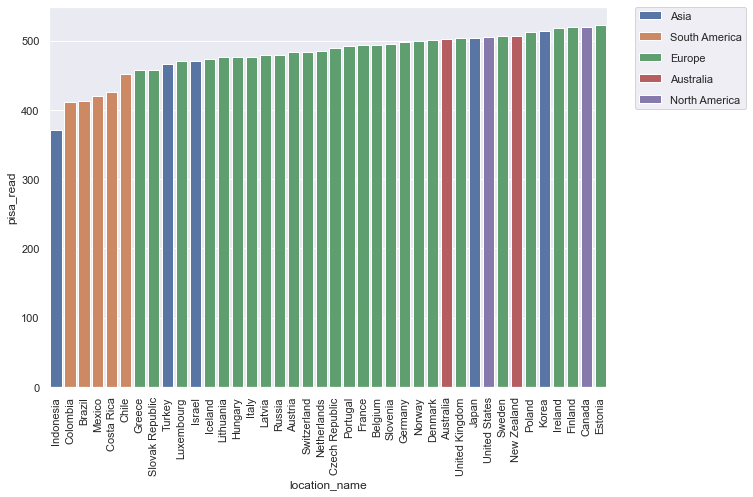

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
plt.figure( figsize = ( 10,7 ))

# The parameter 'x' specifies the values that will 
# be shown on the X-axis
# The parameter 'y' specifies the values that will 
# be shown on the Y-axis
## 'hue' determines the colours of the bars. It can be 
# connected to one of the variables in the
# data frame


sns.barplot( data = df_2018 , x = 'location_name' , y = 'pisa_read' , hue = 'continent' , dodge = False  , ci = None)

plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation = 90 )

plt.show() 


To examine the correlation between `pisa_read` and `pisa_math`, we can visualise these two variables using a scatter plot. 

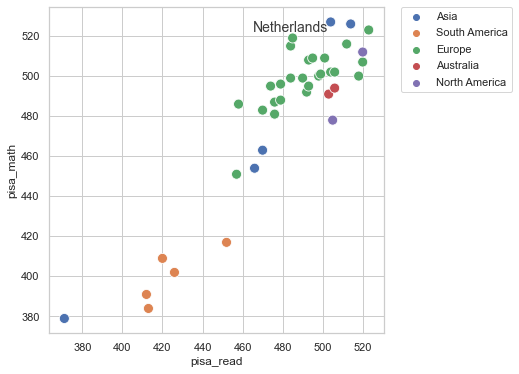

In [11]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure( figsize = ( 6,6 ))


sns.set(style='whitegrid', rc = {'legend.labelspacing': 0.6})

sns.scatterplot(x = 'pisa_read' , y = 'pisa_math' , 
                data = df_2018 , hue = 'continent' , s = 100 ) 

## The next few lines demonstrate the code tha
# can be used to annotate a plot. 
# You can place text on the plot using `plt.text()`
# The code below only labels the dot that represents the Netherlands

country = 'Netherlands'
nl = df_2018[ df_2018['location_name'] == country ] 
plt.text( int ( nl['pisa_read'] ) -20, int ( nl['pisa_math'] ) +3 , country , size = '14', alpha=0.9 )

        
# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.savefig('scatter.jpg')



The code below creates a new data frame, based on the original data frame that was created out of the original CSV file. It firstly select the rows in which the `subject` column either has 'BOY' or 'GIRL' as a value. The second line selects the scores for the Netherlands. 

In [12]:
df_nl = df[ df['subject'].isin( ['BOY','GIRL']  ) ]
df_nl = df_nl[ df_nl['location_name'] == 'Netherlands' ]

The newly created dataframe `df_nl` now contains all the values for Dutch boys and girls, measured in between 2000 and 2018. These values can be plotted as a line chart, using the `lineplot()` method in `Seaborn`. When you add a parameter named `hue`, pointing to one of the variables in the dataframe, different lines will be drawn for all the unique values in this particular column. 

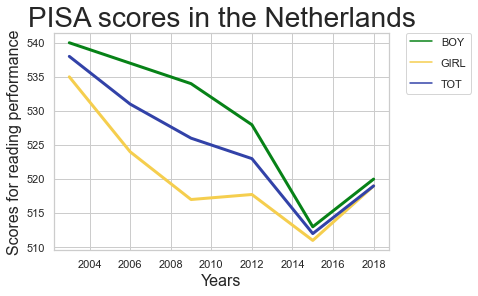

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure( figsize = ( 6,4 ))
ax = plt.axes()



df_nl = df[ df['location_name'] == 'Netherlands' ]



#plt.style.use('seaborn-whitegrid')

sns.lineplot( data = df_nl , x = 'year' , y = 'pisa_math' ,  hue = 'subject' , palette = [ '#078217' , '#f5ce4e' , '#3242a8'] ,  linewidth = 3 )

sns.set(style='whitegrid', rc = {'legend.labelspacing': 1})

# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


ax.set_xlabel('Years' , size = 16 )
ax.set_ylabel('Scores for reading performance' , size = 16 )
ax.set_title( 'PISA scores in the Netherlands' , size = 28 )


plt.savefig('math.png')

A box plot can be created using the `boxplot()` function.

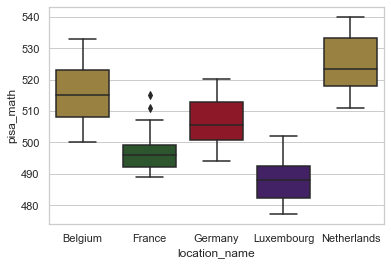

In [14]:
%matplotlib inline

colours = [  '#a88732' ,  '#265c28' , '#a0061a' ,  '#431670' ]

countries = [ 'Netherlands', 'France' , 'Germany' , 'Belgium', 'Luxembourg']
df_countries = df[ df['location_name'].isin(countries) ]

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data= df_countries , x = 'location_name' , y = 'pisa_math' , palette = colours  );


